In [68]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Dataset
path = '/content/income.csv'
df = pd.read_csv(path)

In [69]:
# 3. Cek Dataset
# Check all unique values in income column
print("All unique values in income column:", df['income'].unique())

print("Preview Data:")
print(df.head())
print("\nInfo Dataset:")
print(df.info())

#Cek dan Tangani Nilai Kosong
print("\nNilai kosong sebelum ditangani:\n", df.isnull().sum())
df = df.dropna()  # Atau gunakan imputasi jika diperlukan
print("\nNilai kosong setelah dibuang:\n", df.isnull().sum())

All unique values in income column: ['<=50K' '>50K' '<=50K.' '>50K.']
Preview Data:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             

In [72]:
# 4. Pisahkan fitur dan target
X = df.drop(columns='income')  # Asumsi 'income' adalah kolom target
y = df['income']

# Periksa nilai unik dalam target
print("\nNilai unik dalam target (y):", y.unique())
print("Jumlah nilai untuk setiap kategori:\n", y.value_counts())
print("Jumlah nilai NaN dalam target:", y.isna().sum())


Nilai unik dalam target (y): ['<=50K' '>50K' '<=50K.' '>50K.']
Jumlah nilai untuk setiap kategori:
 income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: count, dtype: int64
Jumlah nilai NaN dalam target: 0


In [73]:
# 5. Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [74]:
# 6. Preprocessing
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Tambahkan imputer untuk data kategorikal
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [75]:
# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Periksa nilai unik dalam y_test
print("\nNilai unik dalam y_test:", y_test.unique())
print("Jumlah nilai untuk setiap kategori dalam y_test:\n", y_test.value_counts())
print("Jumlah nilai NaN dalam y_test:", y_test.isna().sum())


Nilai unik dalam y_test: ['<=50K' '<=50K.' '>50K' '>50K.']
Jumlah nilai untuk setiap kategori dalam y_test:
 income
<=50K     4924
<=50K.    2246
>50K      1617
>50K.      738
Name: count, dtype: int64
Jumlah nilai NaN dalam y_test: 0


In [76]:
# 8. Pipeline Model
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [77]:
# 9. Training
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', KNeighborsClassifier())])

In [78]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [79]:
# 10. Prediksi dan Probabilitas
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

y_pred_dt = dt_pipeline.predict(X_test)
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

In [90]:
# 11. Evaluasi
print("\nClassification Report K-NN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report K-NN:
               precision    recall  f1-score   support

       <=50K       0.59      0.77      0.67      4924
      <=50K.       0.29      0.18      0.22      2246
        >50K       0.48      0.43      0.45      1617
       >50K.       0.24      0.10      0.14       738

    accuracy                           0.52      9525
   macro avg       0.40      0.37      0.37      9525
weighted avg       0.47      0.52      0.48      9525

Classification Report Decision Tree:
               precision    recall  f1-score   support

       <=50K       0.61      0.60      0.60      4924
      <=50K.       0.29      0.30      0.30      2246
        >50K       0.42      0.40      0.41      1617
       >50K.       0.20      0.22      0.21       738

    accuracy                           0.47      9525
   macro avg       0.38      0.38      0.38      9525
weighted avg       0.47      0.47      0.47      9525




Unique values in y_test before mapping: ['<=50K' '<=50K.' '>50K' '>50K.']

Unique values after binary conversion: [0 1]
Value counts after binary conversion: income
0    7908
1    1617
Name: count, dtype: int64


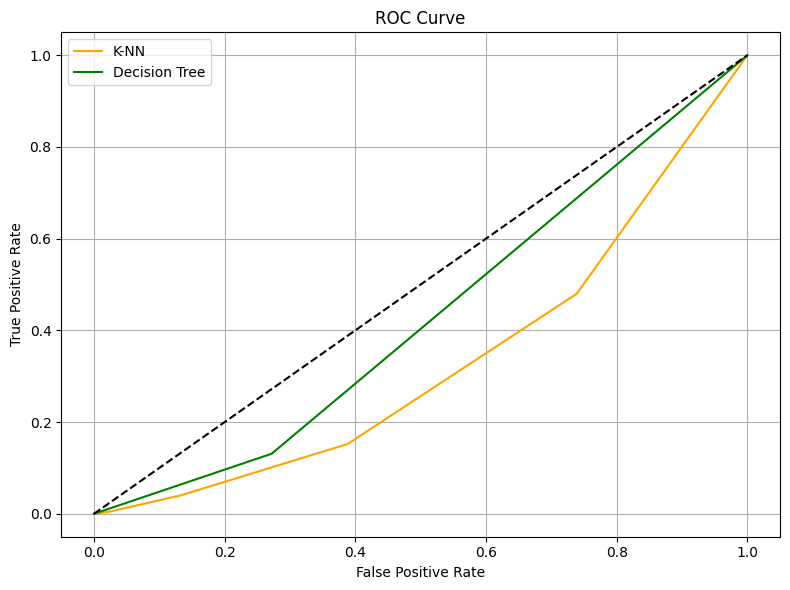

In [81]:
# 12. ROC Curve - Perbaikan mapping dengan konversi eksplisit ke format biner
print("\nUnique values in y_test before mapping:", y_test.unique())

# Konversi ke format biner
y_test_binary = y_test.copy()
y_test_binary = y_test_binary.apply(lambda x: 1 if x == '>50K' else 0)

# Cek hasil konversi
print("\nUnique values after binary conversion:", y_test_binary.unique())
print("Value counts after binary conversion:", y_test_binary.value_counts())

# Gunakan y_test_binary yang sudah dalam format biner
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_proba_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="K-NN", color='orange')
plt.plot(fpr_dt, tpr_dt, label="Decision Tree", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

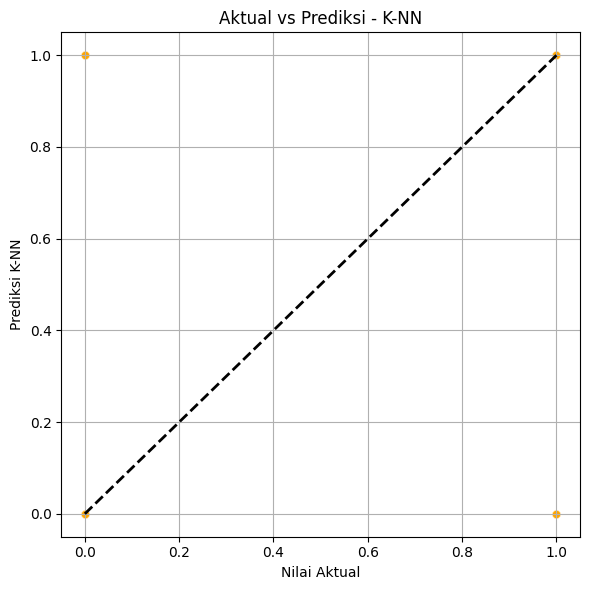

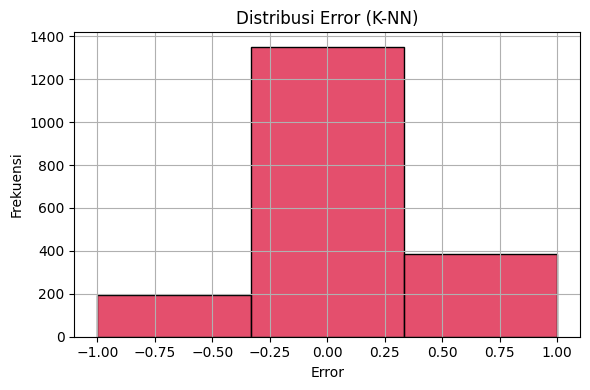

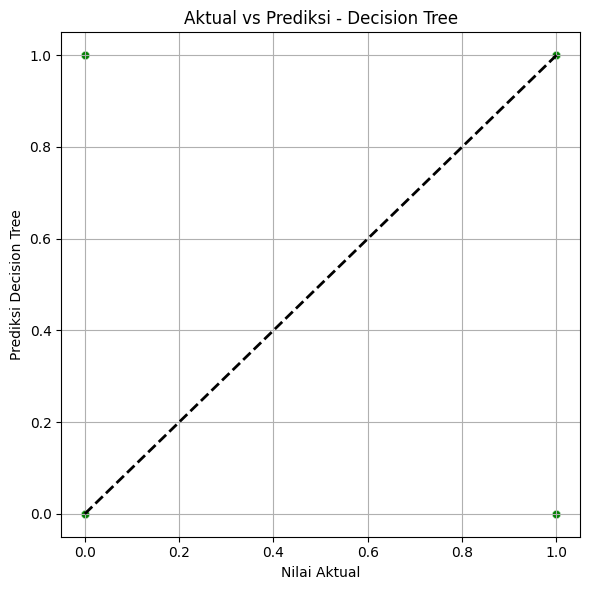

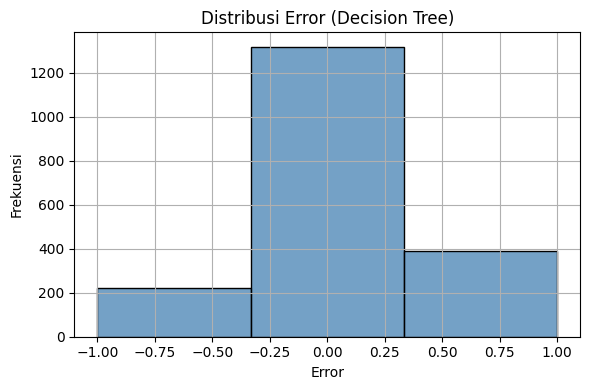

In [82]:
# 13. Visualisasi Aktual vs Prediksi - dengan konversi yang sama
# Karena y_test_binary sudah dibuat di atas, kita bisa langsung menggunakannya
y_test_num = y_test_binary

# Convert predictions to binary format in the same way
y_pred_knn_num = pd.Series(y_pred_knn).apply(lambda x: 1 if x == '>50K' else 0)
y_pred_dt_num = pd.Series(y_pred_dt).apply(lambda x: 1 if x == '>50K' else 0)

# KNN Scatter
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_num, y=y_pred_knn_num, alpha=0.6, color='orange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi K-NN")
plt.title("Aktual vs Prediksi - K-NN")
plt.grid(True)
plt.tight_layout()
plt.show()

# KNN Error Distribusi
errors_knn = y_test_num - y_pred_knn_num
plt.figure(figsize=(6, 4))
sns.histplot(errors_knn, bins=3, kde=False, color='crimson')
plt.title("Distribusi Error (K-NN)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# DT Scatter
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_num, y=y_pred_dt_num, alpha=0.6, color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Decision Tree")
plt.title("Aktual vs Prediksi - Decision Tree")
plt.grid(True)
plt.tight_layout()
plt.show()

# DT Error Distribusi
errors_dt = y_test_num - y_pred_dt_num
plt.figure(figsize=(6, 4))
sns.histplot(errors_dt, bins=3, kde=False, color='steelblue')
plt.title("Distribusi Error (Decision Tree)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()


Metrik evaluasi:
      Metrik      K-NN  Decision Tree
0   Accuracy  0.822992       0.805879
1  Precision  0.476158       0.423984
2     Recall  0.426098       0.400124
3   F1-Score  0.449739       0.411709
4        AUC  0.331098       0.429529


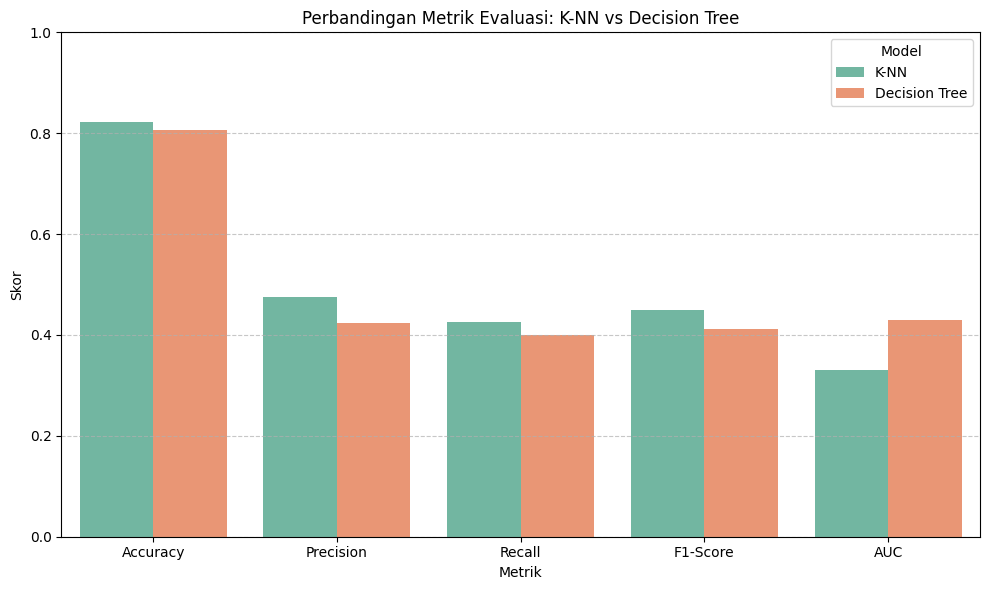

In [86]:
# 14. Visualisasi Perbandingan Metrik - menggunakan format biner untuk semua metrik
accuracy_knn = accuracy_score(y_test_binary, y_pred_knn_num)
precision_knn = precision_score(y_test_binary, y_pred_knn_num)
recall_knn = recall_score(y_test_binary, y_pred_knn_num)
f1_knn = f1_score(y_test_binary, y_pred_knn_num)
auc_knn = roc_auc_score(y_test_binary, y_proba_knn)

accuracy_dt = accuracy_score(y_test_binary, y_pred_dt_num)
precision_dt = precision_score(y_test_binary, y_pred_dt_num)
recall_dt = recall_score(y_test_binary, y_pred_dt_num)
f1_dt = f1_score(y_test_binary, y_pred_dt_num)
auc_dt = roc_auc_score(y_test_binary, y_proba_dt)

# Buat DataFrame untuk Visualisasi
eval_df = pd.DataFrame({
    "Metrik": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"],
    "K-NN": [accuracy_knn, precision_knn, recall_knn, f1_knn, auc_knn],
    "Decision Tree": [accuracy_dt, precision_dt, recall_dt, f1_dt, auc_dt]
})

print("\nMetrik evaluasi:")
print(eval_df)

# Visualisasi
eval_df_melted = eval_df.melt(id_vars="Metrik", var_name="Model", value_name="Skor")

plt.figure(figsize=(10, 6))
sns.barplot(data=eval_df_melted, x="Metrik", y="Skor", hue="Model", palette="Set2")
plt.title("Perbandingan Metrik Evaluasi: K-NN vs Decision Tree")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Kesimpulan**

Dari hasil perbandingan antara K-NN dan Decision Tree, dapat disimpulkan sebagai berikut:

1. **Accuracy**:  
   K-NN memiliki akurasi yang sedikit lebih tinggi (0.822) dibandingkan dengan Decision Tree (0.806).  
   Ini menunjukkan bahwa K-NN sedikit lebih efektif dalam memprediksi kelas secara keseluruhan.

2. **Precision**:  
   K-NN memiliki precision yang lebih tinggi (0.476) dibandingkan dengan Decision Tree (0.424).  
   Ini berarti bahwa K-NN lebih akurat dalam memprediksi kelas positif, meskipun keduanya memiliki precision yang relatif rendah.

3. **Recall**:  
   K-NN memiliki recall yang lebih tinggi (0.426) dibandingkan dengan Decision Tree (0.400).  
   Recall yang lebih tinggi pada K-NN menunjukkan bahwa model ini lebih baik dalam mendeteksi kelas positif yang sebenarnya.

4. **F1-Score**:  
   F1-Score K-NN (0.450) sedikit lebih tinggi dari Decision Tree (0.412).  
   Ini menunjukkan bahwa K-NN lebih seimbang antara precision dan recall.

5. **AUC (Area Under Curve)**:  
   Decision Tree memiliki nilai AUC yang lebih tinggi (0.430) dibandingkan dengan K-NN (0.331).  
   AUC yang lebih tinggi menunjukkan bahwa Decision Tree sedikit lebih baik dalam membedakan antara kelas positif dan negatif.

## **Kesimpulan Umum**:
Secara keseluruhan, K-NN menunjukkan kinerja yang lebih baik pada sebagian besar metrik evaluasi (seperti accuracy, precision, recall, dan F1-score), sementara Decision Tree memiliki performa yang sedikit lebih baik dalam hal AUC.

K-NN tampaknya lebih stabil dan lebih unggul dalam kebanyakan metrik evaluasi, meskipun Decision Tree memiliki keunggulan dalam AUC.


# **Accuracy**

Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


Di mana:

TP (True Positive): Prediksi positif yang benar.

TN (True Negative): Prediksi negatif yang benar.

FP (False Positive): Prediksi positif yang salah.

FN (False Negative): Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.

---
# **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:
$$
Precision = \frac{TP}{TP + FP}
$$


Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.

---
# **Recall**
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:
$$
Recall = \frac{TP}{TP + FN}
$$


Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.

---
# **F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$


F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.

---
# **AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

True Positive Rate (TPR) atau Recall:
$$
TPR = \frac{TP}{TP + FN}
$$



False Positive Rate (FPR):
$$
FPR = \frac{FP}{FP + TN}
$$



AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.

